In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejaswetalviit","key":"cd459eae0045cc388806d1ac4a1cb89e"}'}

In [3]:
!mkdir ~/.kaggle

# Importing Libraries

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9006       1222  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           1337         55  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6019        154  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [7]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 87% 105M/121M [00:00<00:00, 221MB/s] 
100% 121M/121M [00:00<00:00, 196MB/s]


In [8]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [10]:
picture_size = 48
folder_path = '/content/images/images/'

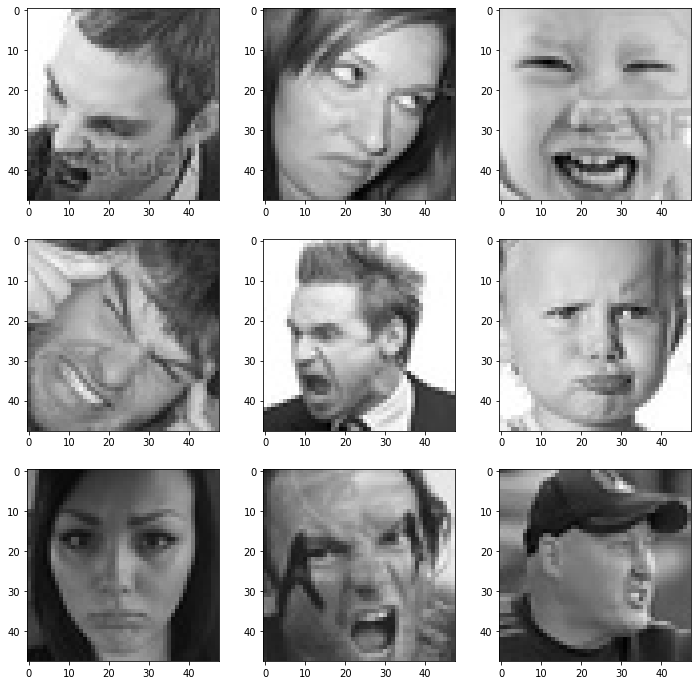

In [11]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [12]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [13]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Fitting the Model with Training and Validation Data 

In [14]:
epochs = 48
import tensorflow as tf

from keras.callbacks import ModelCheckpoint


# checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]



history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size
                                #callbacks=callbacks_list
                                )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/48
225/225 [==============================] - 25s 58ms/step - loss: 2.0122 - accuracy: 0.2324 - val_loss: 1.7139 - val_accuracy: 0.3251
Epoch 2/48
225/225 [==============================] - 14s 61ms/step - loss: 1.8106 - accuracy: 0.3051 - val_loss: 1.6839 - val_accuracy: 0.3472
Epoch 3/48
225/225 [==============================] - 12s 55ms/step - loss: 1.7044 - accuracy: 0.3439 - val_loss: 1.7185 - val_accuracy: 0.3641
Epoch 4/48
225/225 [==============================] - 13s 56ms/step - loss: 1.6343 - accuracy: 0.3722 - val_loss: 1.5521 - val_accuracy: 0.4057
Epoch 5/48
225/225 [==============================] - 13s 56ms/step - loss: 1.5733 - accuracy: 0.3939 - val_loss: 1.4930 - val_accuracy: 0.4256
Epoch 6/48
225/225 [==============================] - 13s 57ms/step - loss: 1.5178 - accuracy: 0.4163 - val_loss: 1.5227 - val_accuracy: 0.4212
Epoch 7/48
225/225 [==============================] - 13s 58ms/step - loss: 1.4762 - accuracy: 0.4311 - val_loss: 1.3838 - val_accuracy:

Confution Matrix and Classification Report

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
Classification Report
              precision    recall  f1-score   support

Disappointed       0.58      0.51      0.54       960
      Bordem       0.76      0.61      0.68       111
        Fear       0.55      0.40      0.47      1018
Satisfactory       0.86      0.81      0.83      1825
  Engagement       0.58      0.58      0.58      1216
         Sad       0.48      0.56      0.52      1139
    Surprise       0.61      0.86      0.72       797

    accuracy                           0.63      7066
   macro avg       0.63      0.62      0.62      7066
weighted avg       0.64      0.63      0.63      7066



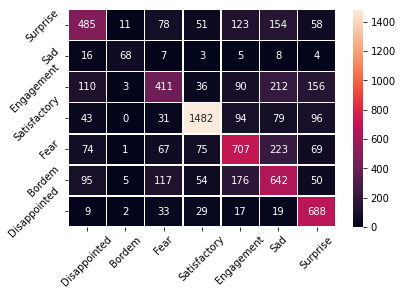

<Figure size 1440x1440 with 0 Axes>

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = model.predict_generator(test_set, test_set.n // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
my_matrix = confusion_matrix(test_set.classes, y_pred)
#print(my_matrix)
ax = plt.subplot()
plt.figure(figsize=(20,20))
sns.heatmap(my_matrix,annot = True,fmt = "d",linewidth = 0.5,ax = ax)
ax.xaxis.set_ticklabels(['Disappointed','Bordem','Fear','Satisfactory','Engagement','Sad','Surprise'],rotation = 45); ax.yaxis.set_ticklabels(['Surprise','Sad','Engagement','Satisfactory','Fear','Bordem','Disappointed'],rotation = 45)
print('Classification Report')
target_names = ['Disappointed','Bordem','Fear','Satisfactory','Engagement','Sad','Surprise']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

# Saving the Model

In [16]:
model.save("./model.h5")

# Plotting Accuracy & Loss

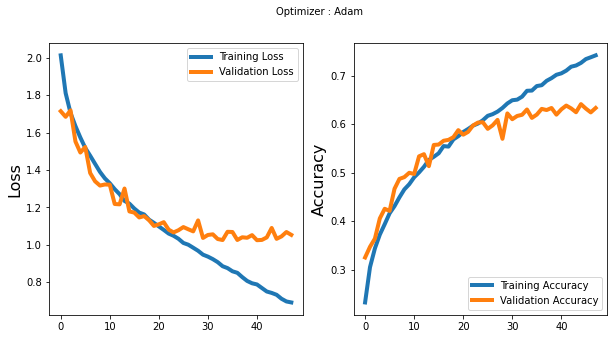

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss',linewidth = 4)
plt.plot(history.history['val_loss'], label='Validation Loss',linewidth = 4)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy',linewidth = 4)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',linewidth = 4)
plt.legend(loc='lower right')
plt.show()